In [8]:
import os

from PIL import Image
from PIL import GifImagePlugin
import cv2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import linear_model

from tqdm import tqdm
# from time import sleep
# for i in tqdm(range(10)):
#     sleep(3)

In the following few lines of code, we're gonna separate a GIF in frames and predict a new one. 

Organize the directories we're going to use later:

In [9]:
home = '../'
gif_path1 = '../gif/schmidt.gif'
frame_path = "./frames/"
targets_folder = '/targets/'

Using PILLOW we can easily take a look at few characteristics of the object:

In [10]:
img  = Image.open(gif_path1)

print(img, end = "\n\n")
print(img.is_animated)
print(img.n_frames)

#insert the number of frame you want to visualize
img.seek(1)
#return the n of the visualized frame
img.tell()

<PIL.GifImagePlugin.GifImageFile image mode=P size=500x281 at 0x1E224B531D0>

True
32


1

Extract every frame of the GIF and save it in a new folder 

In [11]:
#extract every frame of the gif and save it in a new folder
for i in range(0, img.n_frames):
    img.seek(i)
    img.save(frame_path + "/" +str(i)+".png")

___

Now, using OPENCV library, convert every frame of the gif to gray scale(binary) and extract information about the image.

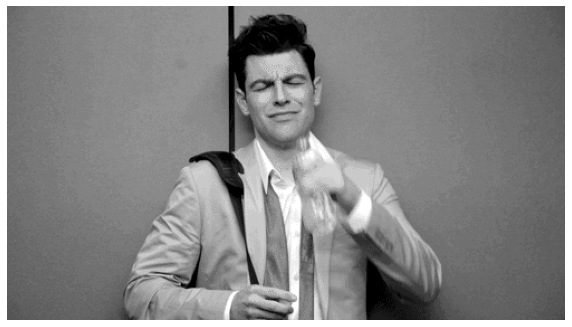

In [82]:
fig = plt.figure(figsize = (10,10))
image = cv2.imread(frame_path+"1.png") 
img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
plt.imshow(img, "binary_r") 
plt.axis('off') 
plt.show()

Now with a for loop we can iterate through every frame in the chosen directory, display it in black and white and flatten it o a 1D array. 

Frame: 1
Shape: (281, 500)


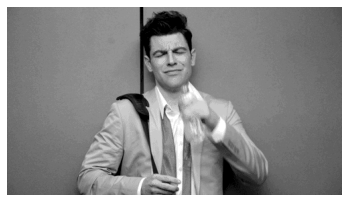

Frame: 2
Shape: (281, 500)


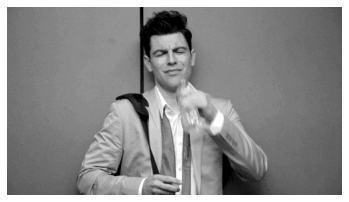

Frame: 3
Shape: (281, 500)


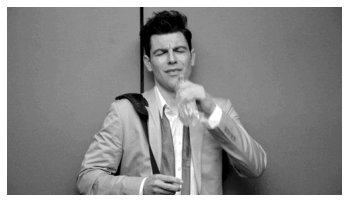

Frame: 4
Shape: (281, 500)


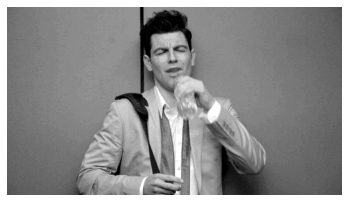

Frame: 5
Shape: (281, 500)


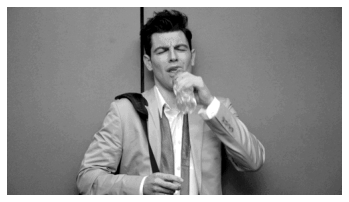

Frame: 6
Shape: (281, 500)


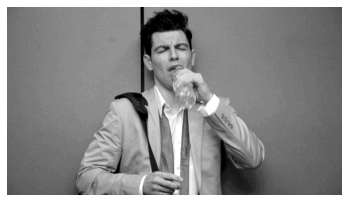

Frame: 7
Shape: (281, 500)


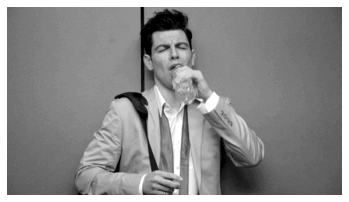

Frame: 8
Shape: (281, 500)


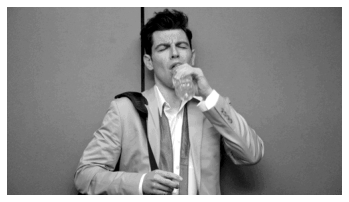

Frame: 9
Shape: (281, 500)


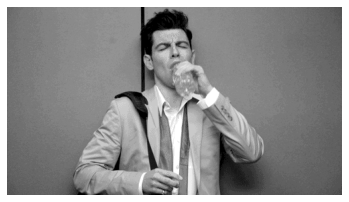

Frame: 10
Shape: (281, 500)


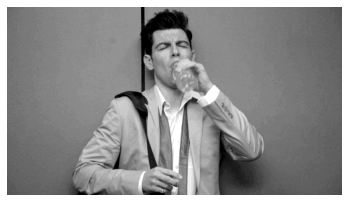

Frame: 11
Shape: (281, 500)


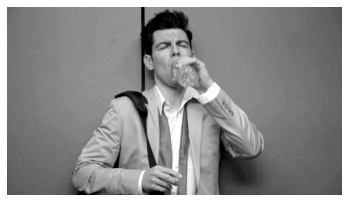

Frame: 12
Shape: (281, 500)


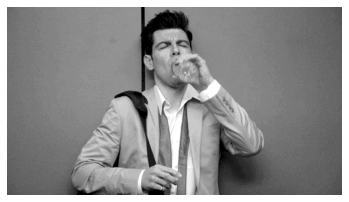

Frame: 13
Shape: (281, 500)


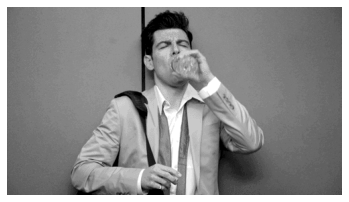

Frame: 14
Shape: (281, 500)


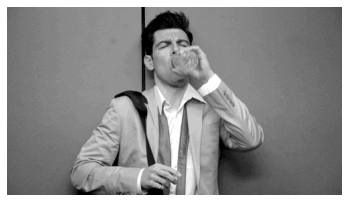

Frame: 15
Shape: (281, 500)


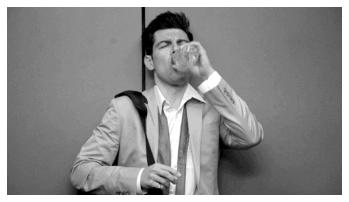

Frame: 16
Shape: (281, 500)


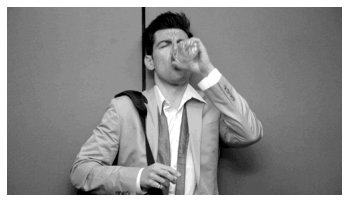

Frame: 17
Shape: (281, 500)


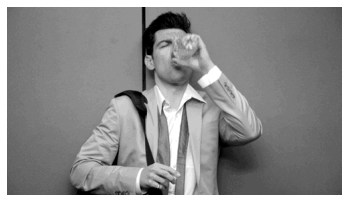

Frame: 18
Shape: (281, 500)


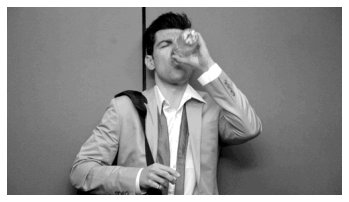

Frame: 19
Shape: (281, 500)


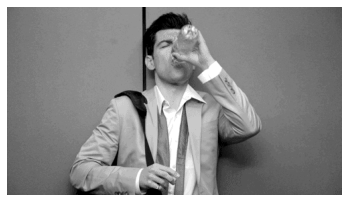

Frame: 20
Shape: (281, 500)


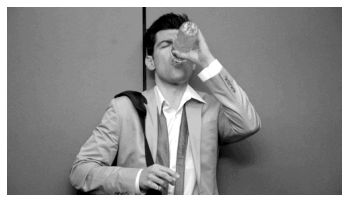

Frame: 21
Shape: (281, 500)


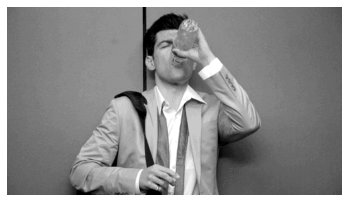

Frame: 22
Shape: (281, 500)


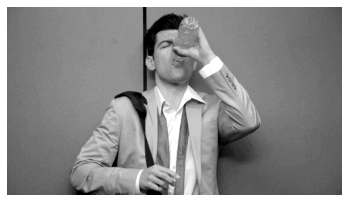

Frame: 23
Shape: (281, 500)


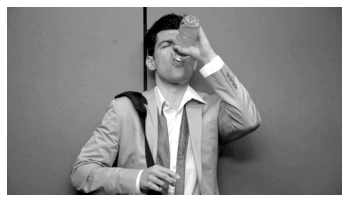

Frame: 24
Shape: (281, 500)


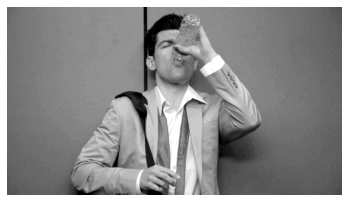

Frame: 25
Shape: (281, 500)


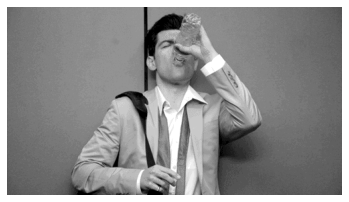

Frame: 26
Shape: (281, 500)


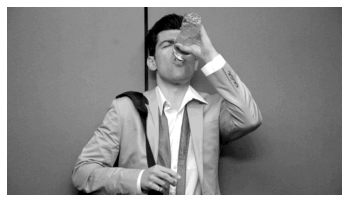

Frame: 27
Shape: (281, 500)


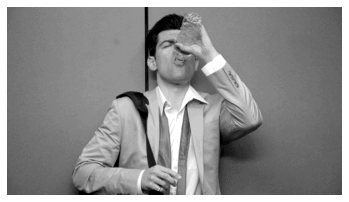

Frame: 28
Shape: (281, 500)


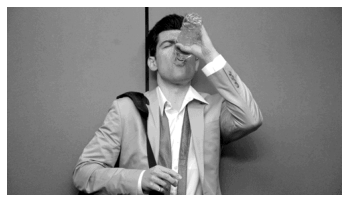

Frame: 29
Shape: (281, 500)


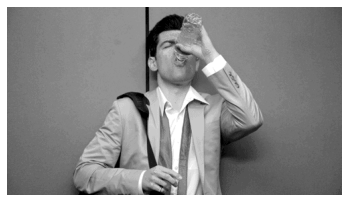

Frame: 30
Shape: (281, 500)


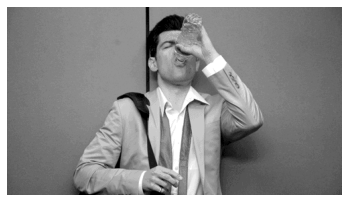

Frame: 31
Shape: (281, 500)


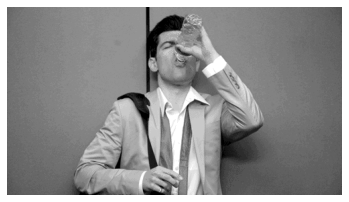

In [18]:
data = []
fig = plt.figure()
for i in range(1, 32):
    print("Frame: {}".format(i))
    image = cv2.imread(frame_path+"/{}.png".format(i))
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    data.append(img.flatten())
    print("Shape: {}".format(img.shape))
    plt.imshow(img, "binary_r")
    plt.axis("off")
    plt.show()
data = np.array(data)

In [46]:
data.shape

(31, 140500)

Since we now have all the images we need, we can use them as data to predict a new list of frames. Implementing some easy machine learning technique as Decision Tree Regressor or Linear Regression.

The predicted pixels of the frame will be added to a list, which will be later transformed to an array and reshaped as we wish.

In [27]:
from sklearn import tree
from sklearn.linear_model import LinearRegression

targets = []

for j in range(1, 33):
    
    pixels = []
    count = 0
    frm = j

    for i in tqdm(range(data.shape[1])):

        X = np.array(list(range(1, frm))+list(range(frm+1,33))).reshape(-1,1)
        y = data[:, i]
        regr = tree.DecisionTreeRegressor()
    #     regr = linear_model.LinearRegression()
        regr.fit(X, y)
        val = regr.predict(np.array([[frm]]))
        pixels.append(val)
    target = np.array(pixels).reshape(281,500)
    targets.append(target)

100%|██████████| 140500/140500 [00:59<00:00, 2342.61it/s]


We can now plot a quick preview of the predicted frames, remember to set it back to black and white

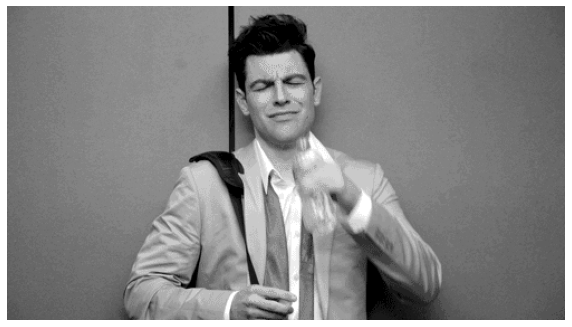

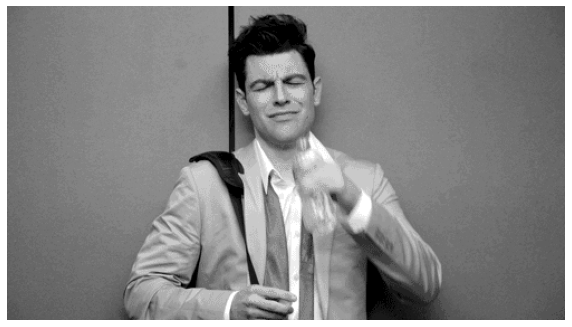

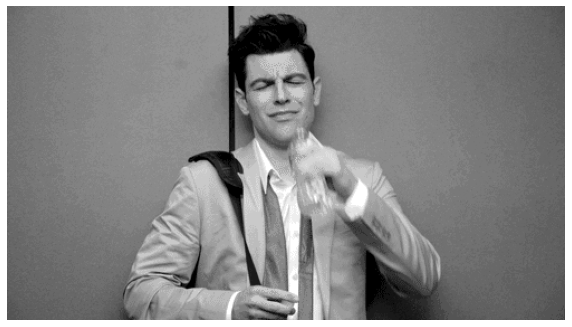

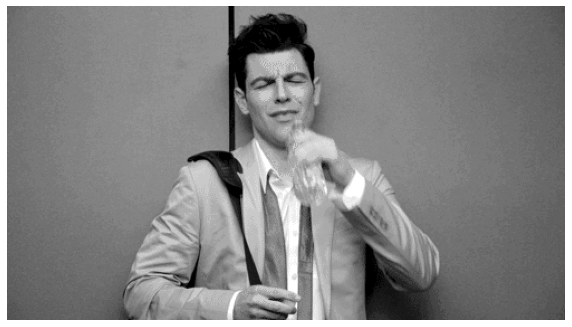

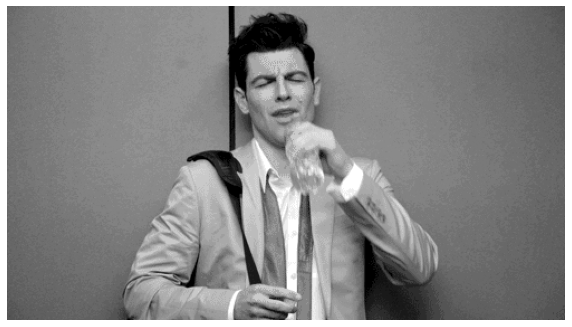

In [86]:
for index, frame in enumerate(targets[:5]):
    
    fig = plt.figure(figsize = (10,10))
    plt.imshow(frame ,cmap="binary_r")
    plt.axis("off")
    plt.savefig(targets_folder+ "/{}.png".format(index+1))

We now have predicted all the frames we need to create a new GIF. To continue we'll use the library imageio, to easily process the images. 

Check at: **https://imageio.readthedocs.io/en/stable/userapi.html** for documentation

In [73]:
import imageio

images = []
for i in sorted(os.listdir(os.chdir(targets_folder)), key = lambda x: len(x)):
    frame = imageio.imread(targets_folder+"/{}".format(i))
    images.append(frame)    

The function **mimwrite** allow to write more images at once, and choose the fps to offer better control.

In [80]:
imageio.mimwrite(home+ "/gif/thirsty_schmidt.gif", images, fps = 20)

The new predicted GIF is now complete!